# Trainer model for hairbless,lobate
# works on actual prescription
# model saved as FinalModel2.h5

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import random

In [2]:
train_dir = os.path.join(os.getcwd(),'tst3\\train')
valid_dir = os.path.join(os.getcwd(),'tst3\\test')
categories = ['hairbless','lobate']

In [3]:
img_height = 80
img_width = 160
def process_data(input_directory):
    #takes a image folder directory and makes image numpy array with corresponding labels
    data = []
    for kategory in categories:
        folder_path = os.path.join(input_directory,kategory)
        images_list = os.listdir(folder_path)
        img_label = categories.index(kategory)
        for img in images_list:
            img_path = os.path.join(folder_path,img)
            img_array = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img_array,(img_width,img_height))
            resized_img = resized_img.reshape(resized_img.shape + (1,))
            data.append([resized_img,img_label])
    return data

In [4]:
def data_shuffler(data_list):
    """"1.takes python-list which has lists of img-arrays and corresponding labels.
        2.shuffles the entire data list,separates them into img array and label array.
        3.returns both as numpy arrays."""
    run_len = len(data_list)
    random.shuffle(data_list)
    images =  []
    labels = []
    for i in range(run_len):
        images.append(data_list[i][0])
        labels.append(data_list[i][1])
    images = np.array(images)
    labels = np.array(labels)
    return images,labels

In [5]:
def plotter(number,image_array,label_array,option):
    """takes no.of images to plot,img-array,label-array and plot them.
        option = 0 to plot label,1 to not plot."""
    class_names = ['hairbless','lobate']
    plt.figure(figsize=(10,10))
    for i in range(number):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(image_array[i],2), cmap=plt.cm.binary)
        if(option == True):
            plt.xlabel(class_names[label_array[i]])
    plt.show()

In [6]:
def test_image_array(directory):
    """takes directory of test images,reads them and converts them into numpy arrays."""
    image_list = os.listdir(directory)
    test_array = []
    for image in image_list:
        image_array = cv2.imread(os.path.join(directory,image),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(image_array,(img_width,img_height))
        new_array = new_array.reshape(new_array.shape + (1,))
        test_array.append(new_array)
    test_array = np.array(test_array)
    test_array = test_array/255.0
    return test_array

In [7]:
#cells from here can't be run for now.
training_data = process_data(train_dir)
validation_data = process_data(valid_dir)
#generating trainig and validation sets.
train_input_img,train_input_label = data_shuffler(training_data)
valid_input_img,valid_input_label = data_shuffler(validation_data)
#scaling pixel intensities between 0 and 1.
train_input_img = train_input_img/255.0
valid_input_img = valid_input_img/255.0

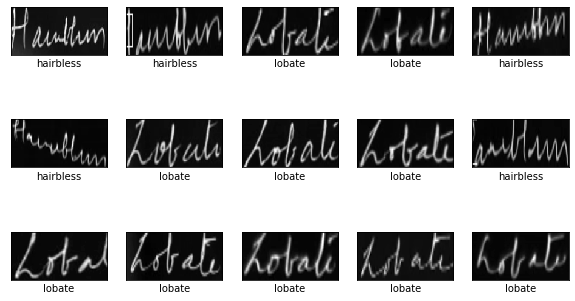

(417, 80, 160, 1)

In [8]:
#plot the sets
plotter(15,train_input_img,train_input_label,True)
train_input_img.shape

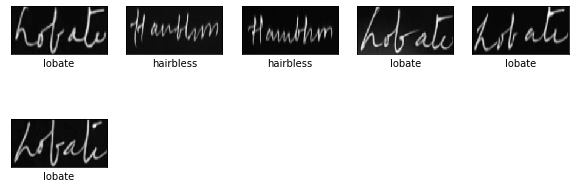

(20, 80, 160, 1)

In [9]:
plotter(6,valid_input_img,valid_input_label,True)
valid_input_img.shape

In [10]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 160,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_input_img, train_input_label, epochs=10, 
                    validation_data = (valid_input_img, valid_input_label))

Train on 417 samples, validate on 20 samples
Epoch 1/10
417/417 [==============================] - 5s 13ms/sample - loss: 0.7065 - accuracy: 0.6355 - val_loss: 0.6546 - val_accuracy: 0.6500
Epoch 2/10
417/417 [==============================] - 0s 1ms/sample - loss: 0.6267 - accuracy: 0.6787 - val_loss: 0.6328 - val_accuracy: 0.6500
Epoch 3/10
417/417 [==============================] - 0s 1ms/sample - loss: 0.5827 - accuracy: 0.6787 - val_loss: 0.4931 - val_accuracy: 0.6500
Epoch 4/10
417/417 [==============================] - 0s 1ms/sample - loss: 0.2892 - accuracy: 0.8777 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 5/10
417/417 [==============================] - 0s 1ms/sample - loss: 0.0491 - accuracy: 0.9808 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 6/10
417/417 [==============================] - 0s 1ms/sample - loss: 0.0902 - accuracy: 0.9688 - val_loss: 0.0609 - val_accuracy: 1.0000
Epoch 7/10
417/417 [==============================] - 0s 1ms/sample - loss: 0.0399 - accur

20/1 - 0s - loss: 0.0010 - accuracy: 1.0000


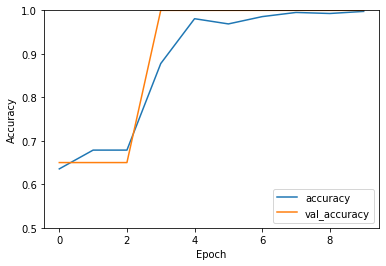

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(valid_input_img,  valid_input_label, verbose=2)

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

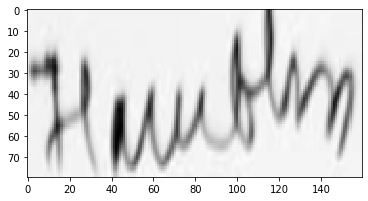

(3, 80, 160, 1)

In [19]:
test_img = test_image_array(os.path.join(os.getcwd(),'f'))
plt.imshow(np.squeeze(test_img[0],2),cmap = 'gray')
plt.show()
test_img.shape

In [20]:
predictions = probability_model.predict(test_img)

In [21]:
for i in range(0,len(predictions)):
    predictions[i]
    print('{0}. {1}'.format(i+1,categories[(int(np.argmax(predictions[i])))]))

1. hairbless
2. lobate
3. hairbless


In [22]:
model.save('FinalModel2.h5')